Importing numpy, matplotlib.plt, pandas and representing them as variable np, plt, pd.
Importing train_test_split from sklearn.model_selection package which is to split a collection into two parts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

The dataset is in url:https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
It is read as a csv into the variable bnote which stores info as a DataFrame. The column names are set after referring the
description of the dataset.

In [2]:
bnote=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')
bnote.columns=['variance','skewness','curtosis','entropy','class']

To check whether there are any missing values in the dataset. If present then column must be dropped.

In [3]:
print(bnote.describe())

          variance     skewness     curtosis      entropy        class
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


Applying pearson correlation to check for the relation between 2 features.

In [4]:
correlation=bnote.corr('pearson')
correlation

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.263333,-0.380358,0.276666,-0.724655
skewness,0.263333,1.000000,-0.786729,-0.526896,-0.444281
curtosis,-0.380358,-0.786729,1.000000,0.319219,0.155346
entropy,0.276666,-0.526896,0.319219,1.000000,-0.023200
class,-0.724655,-0.444281,0.155346,-0.023200,1.000000


For a more better understanding of the data- data is visualised using pairplots from seaborn package.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


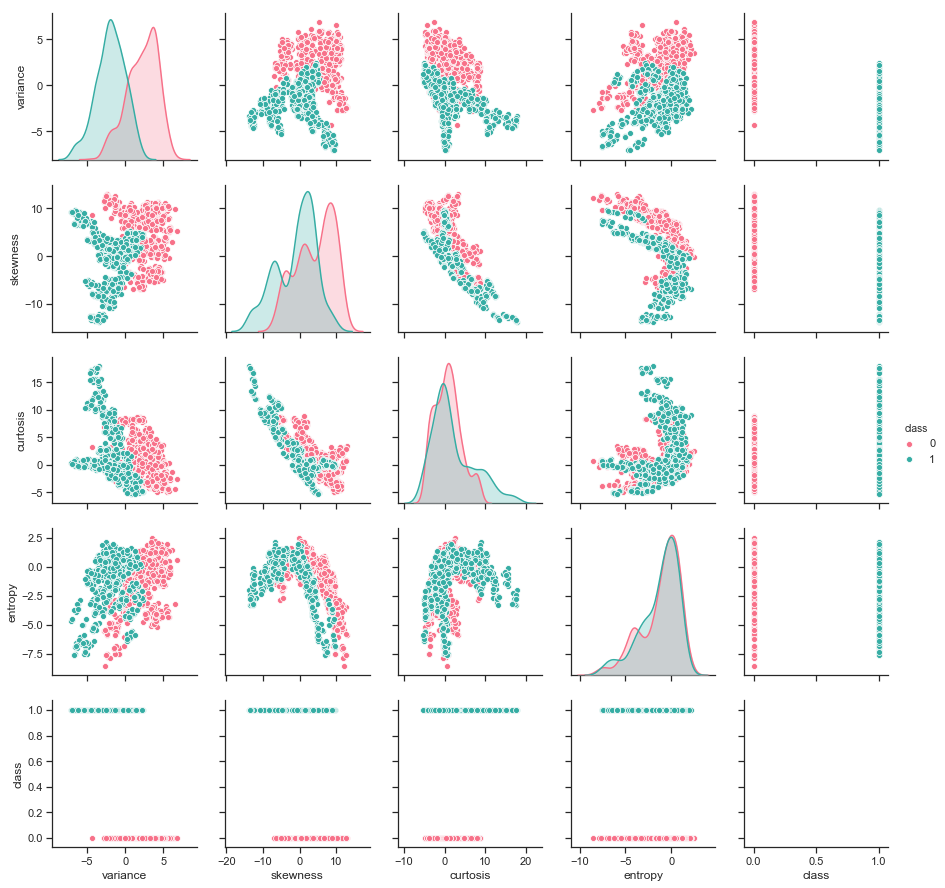

In [5]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(bnote,hue="class",palette="husl")

Storing all the features of bnote into Dataframe called features. Features are the attributes of the banknote picture.
They are Variance, Skewness, Curtosis, Entropy.
Storing the target called class from bnote into Dataframe called target. Target is the classification whether the banknote
is original or fake.
Features have been scaled so calculations can be more easier.

In [6]:
features=pd.DataFrame(bnote.drop(('class'),axis=1))
target=pd.DataFrame(bnote,columns=['class'])
features=(features-features.min())/(features.max()-features.min())

List of features is divided into 2 parts : 1 to be trained on and the other to be tested on.
Correspondig class values that is target is also split into 2 parts: training and testing dataset.

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25)

It is appropriate to take the square root of the no. of samples to be considered as n-neighbours.
At K=1, we were overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, we can segregate the training and validation from the initial dataset. Now plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.

In [88]:
k=int(np.sqrt(len(target)))
k

37

basex is the base of features upon which the model is trained on. basey is the target into which the values are classified while training.
testx and testy are the data for validating the model which contain the values of the features and the class they are classified into while observation respectively.

In [89]:
f1='curtosis'
f2='variance'
f3='skewness'
basex=np.array(xtrain[[f1,f2,f3]])
basey=np.array(ytrain["class"])
testx=np.array(xtest[[f1,f2,f3]])
testy=np.array(ytest["class"])

For getting the predicted class, iterate from 0 to total number - 1 of training data points:
* Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
* Sort the calculated distances in ascending order based on distance values
* Get top k rows from the sorted array
* Get the most frequent class of these rows
* Return the predicted class

Calculating the euclidian distance from the training point to the test point.

In [90]:
def euclidean_distance(train_point,test_point):
    distance=np.sum((train_point-test_point)**2)
    return np.sqrt(distance)

Returning the list of all distances from the trining point to all the others.

In [91]:
def calc_distance_from_all(all_points,given_point,predictions):
    all_distances=[]
    for i,each in enumerate(all_points):
        distance=euclidean_distance(each,given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup:tup[0])
    return all_distances

In [92]:
def get_neighbours(distances,count):
    return distances[:count]

Predicting the class the training point belongs to.

In [93]:
def predict(all_points,given_point,predictions):
    distances=calc_distance_from_all(all_points,given_point,predictions)
    neighbours=get_neighbours(distances,k)
    op=[row[-1] for row in neighbours]
    prediction = max(set(op),key=op.count)
    return prediction

Calculating the amount of accurate predictions to the total no. of samples.

In [94]:
def accuracy(basex,basey,testx,testy):
    correct=0
    for i in range(len(testx)):
        p=predict(basex,testx[i],basey)
        if p==testy[i]:
            correct+=1
    return f"Accuracy: {correct*100/len(testy)}"

In [95]:
test1=[testx[0][0],testx[1][0]]

In [96]:
accuracy(basex,basey,testx,testy)

'Accuracy: 97.95918367346938'

A classification report on how accurately model worked.

In [97]:
predy=[]
for i in range(len(testx)):
    predy.append(predict(basex,testx[i],basey))


from sklearn.metrics import classification_report
print(classification_report(testy,predy))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       202
           1       0.95      1.00      0.98       141

   micro avg       0.98      0.98      0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



f1-score = 2 * precision * recall / (precision + recall)

KNN algorithm is one of the simplest classification algorithm. Even with such simplicity, it can give highly competitive results. KNN algorithm can also be used for regression problems. The only difference from the discussed methodology will be using averages of nearest neighbors rather than voting from nearest neighbors. 